## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [2]:
from sklearn import datasets, metrics

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [31]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=4, min_samples_leaf=4)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [32]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


In [33]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [34]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.03892992 0.         0.05675901 0.90431106]


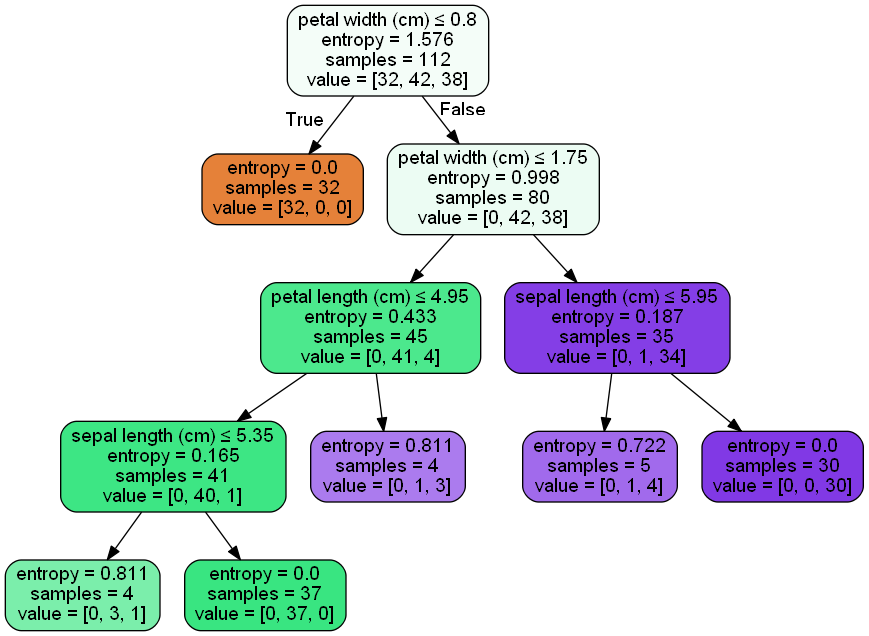

In [35]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names = iris.feature_names, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Boston

In [39]:
boston = datasets.load_boston()

reg = DecisionTreeRegressor(criterion='mse')

x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=50)

reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)

In [40]:
mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE: ",mse)

MSE:  27.027039473684216


In [44]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [45]:
print("Feature importance: ", reg.feature_importances_)

Feature importance:  [6.22020727e-02 2.27388493e-04 8.58117638e-03 0.00000000e+00
 1.25608956e-02 6.17622444e-01 5.16596089e-03 5.80623380e-02
 2.57423291e-03 1.96239414e-02 1.54788091e-02 5.04009746e-03
 1.92860643e-01]


In [49]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data_boston = StringIO()
export_graphviz(reg, out_file=dot_data_boston, feature_names=boston.feature_names, 
                   filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data_boston.getvalue())
Image(graph.create_png())

In [50]:
graph.write_png("Boston_house_prices_tree.png")

True

## Digit

In [64]:
digit = datasets.load_digits()

clf = DecisionTreeClassifier(criterion='gini')

x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, test_size=0.3, random_state=50)

clf.fit(x_train,y_train)

y_pred = reg.predict(x_test)

In [65]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ",acc)

Accuracy:  0.8203703703703704


In [66]:
r2 = metrics.r2_score(y_test, y_pred)
print("R2_score: ",r2)

R2_score:  0.6839500514972253


In [67]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.00147354 0.0140994  0.00338915 0.00347749 0.04805678
 0.00176825 0.00175057 0.         0.00250103 0.01707445 0.00088413
 0.01058194 0.02498225 0.         0.         0.         0.00608395
 0.01488657 0.0313253  0.04811982 0.10327909 0.         0.
 0.         0.0021219  0.06331141 0.05415377 0.00974936 0.
 0.00235767 0.         0.         0.05808457 0.01785115 0.00241125
 0.07297525 0.0138759  0.01578727 0.         0.         0.
 0.12464072 0.05372472 0.00908374 0.00088413 0.01026429 0.
 0.         0.         0.00754663 0.00176825 0.0081763  0.00650503
 0.02793543 0.         0.         0.00088413 0.00340389 0.00265238
 0.06656429 0.02734255 0.00221032 0.        ]


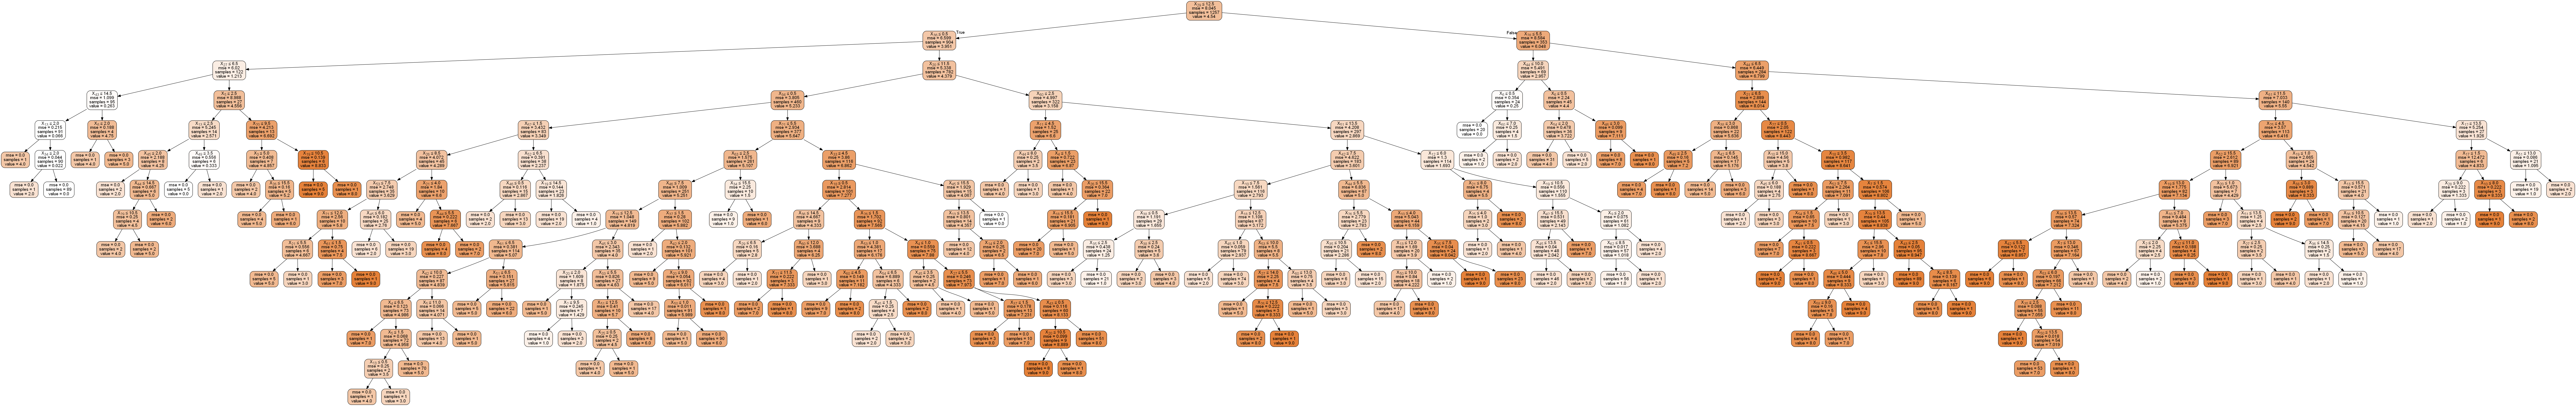

In [69]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data_boston = StringIO()
export_graphviz(reg, out_file=dot_data_boston, 
                   filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data_boston.getvalue())
Image(graph.create_png())

In [70]:
graph.write_png("Digits.png")

True